In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [31]:
#we import required libaries needed to do Exploratory Data Analysis

In [36]:
data = pd.read_csv(r"C:\Users\fairy\OneDrive\Desktop\WHR.csv")

In [4]:
#we read our csv in to 'data'. We use 'r' because python considers backslash as character. r stands for raw and will cause python to read backslash as actual blackslash

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [6]:
# we have a general idea about the data i.e No. of data columns, Names of data columns, datatypes of these data columns;

In [7]:
data.head(30)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [8]:
#To get basic understanding of how the data looks. Since we have passed the argument 30, we get the first 30 data points in our dataset

In [9]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [10]:
#we check if any columns here have null values in them

In [11]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [12]:
#we are calculating statistical data like percentile, mean and std of numerical values of series or dataframe

In [13]:
data[data['Country'] == 'United States']

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.1589,0.40105,2.51011


In [14]:
#we get a more detailed information unites states stats

In [15]:
data['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [16]:
#we print all the regions present in the database

In [17]:
for region in data['Region'].unique():
    print(len(data[data['Region'] == region]), region)

21 Western Europe
2 North America
2 Australia and New Zealand
20 Middle East and Northern Africa
22 Latin America and Caribbean
9 Southeastern Asia
29 Central and Eastern Europe
6 Eastern Asia
40 Sub-Saharan Africa
7 Southern Asia


In [18]:
#we get an idea the amount of rows delegated to each regions. E.g. 21 Western Europe means that there are 21 rows with Western Europe as a region

In [19]:
rows_list=[]
for region in data['Region'].unique():
    happinessRankSum = data.loc[data['Region'] == region]['Happiness Rank'].sum()
    numCountriesInRegion = len(data.loc[data['Region'] == region])
    avgHappinessScorePerRegion = happinessRankSum/numCountriesInRegion;
    dict1 = {'Region': region, 'Happiness Rank Per Region': avgHappinessScorePerRegion, 'numCountriesInRegion': numCountriesInRegion};
    rows_list.append(dict1)

In [20]:
#writing statistical formula for happinessRanSum and avgHappinessScore per region

In [21]:
df = pd.DataFrame(rows_list)
df.sort_values(['Happiness Rank Per Region'], ascending=True, inplace=True)
df

,Region,Happiness Rank Per Region,numCountriesInRegion
2,Australia and New Zealand,9.500000,2
1,North America,10.000000,2
0,Western Europe,29.523810,21
4,Latin America and Caribbean,46.909091,22
7,Eastern Asia,64.500000,6
3,Middle East and Northern Africa,77.600000,20
6,Central and Eastern Europe,79.000000,29
5,Southeastern Asia,81.222222,9
9,Southern Asia,113.142857,7
8,Sub-Saharan Africa,127.900000,40


In [22]:
#we sort the data in ascending order by Happiness Rank per region 

C:\Users\fairy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Australia and New Zealand'),
 Text(1, 0, 'North America'),
 Text(2, 0, 'Western Europe'),
 Text(3, 0, 'Latin America and Caribbean'),
 Text(4, 0, 'Eastern Asia'),
 Text(5, 0, 'Middle East and Northern Africa'),
 Text(6, 0, 'Central and Eastern Europe'),
 Text(7, 0, 'Southeastern Asia'),
 Text(8, 0, 'Southern Asia'),
 Text(9, 0, 'Sub-Saharan Africa')]

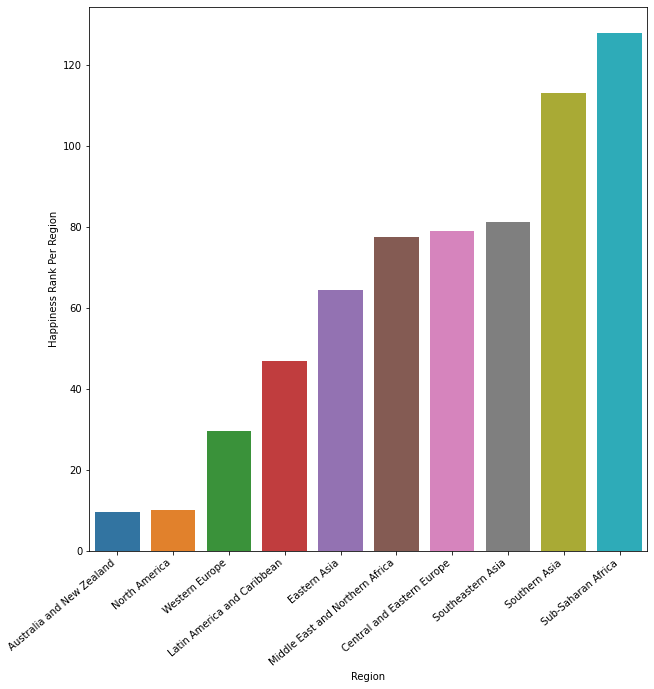

In [23]:
plt.figure(figsize=(10,10))
ax = sns.barplot(df['Region'], df['Happiness Rank Per Region'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

In [24]:
#we do a visual representation of Happiness rank per region

In [25]:
df.groupby('Region')[['Happiness Rank Per Region']].median()

,Happiness Rank Per Region
Region,
Australia and New Zealand,9.500000
Central and Eastern Europe,79.000000
Eastern Asia,64.500000
Latin America and Caribbean,46.909091
Middle East and Northern Africa,77.600000
North America,10.000000
Southeastern Asia,81.222222
Southern Asia,113.142857
Sub-Saharan Africa,127.900000


C:\Users\fairy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

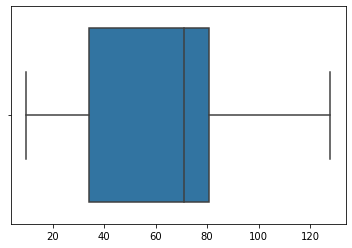

In [26]:

sns.boxplot(np.array(df['Happiness Rank Per Region']))

In [27]:
#boxplot to check for outliers

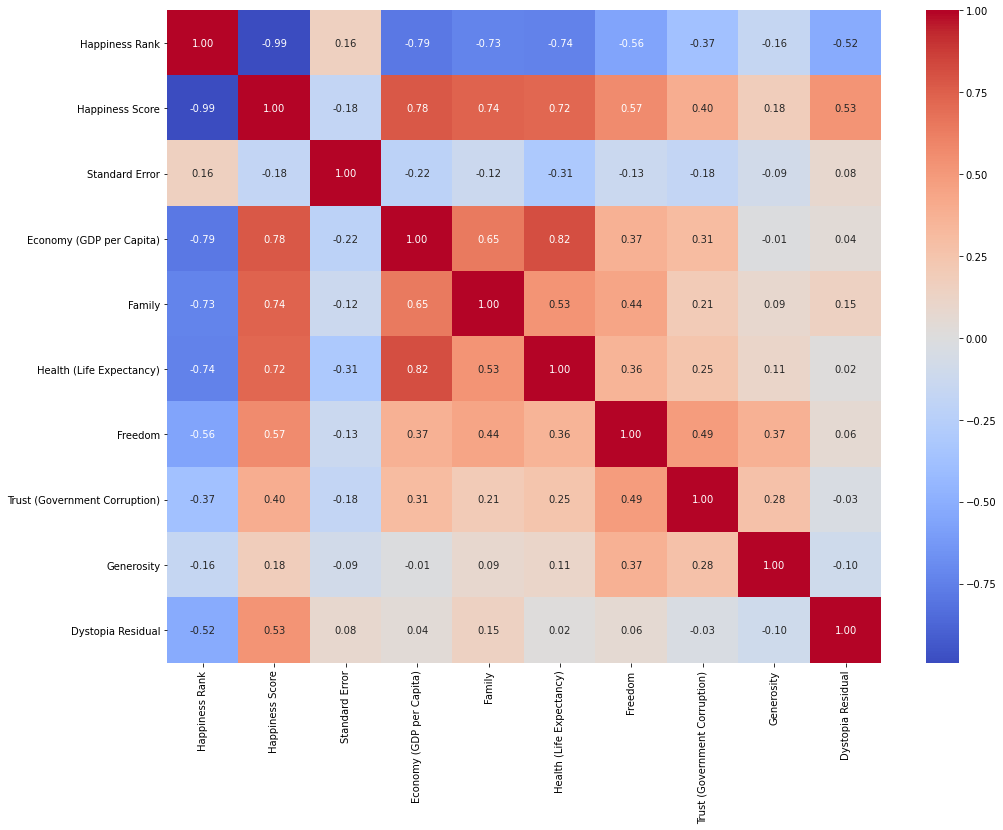

In [28]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [29]:
#heatmap to check for any correlations between the data